## Raster data

![](../assets/vector-raster.png) 

image credit: https://101gis.com/vector-data-vs-raster-data/

Raster (or gridded) data consists of rows and columns of pixels that each represent a specific geographic location and an attribute value. Probably the most familiar example of raster data are images. They can either contain a single (black and white) or multiple bands/levels of information (red, green, blue channels for color images). Typical examples of geographical raster data are satellite observations or climate model output.

![](../assets/raster_data.jpg) 

image credit: National Ecological Observatory Network (NEON)

## Raster data in xarray 

In a similar way as we used `geopandas` to handle spatial vector data, we will use the [`xarray` package](https://docs.xarray.dev/en/stable/) as our premier tool to work with gridded, multi-dimensional data sets. In fact, since both of these packages are heavily inspired and build upon [pandas](https://pandas.pydata.org), they also share a lot of common design philosophies and syntax rules.

The two core data structures of `xarray` are:
- `DataArray`: holds a single multi-dimensional variable and it's metadata
- `DataSet`: holds multiple variables (i.e. `DataArrays`) with shared dimensions

![](../assets/xarray.webp) 

image credit: https://docs.xarray.dev/en/stable/user-guide/data-structures.html

It is easiest to think of an `DataArray` just as a `numpy` array with labels. Maybe this does not sound very exciting yet, but you will see that these labels will make handling multi-dimensional arrays so much easier!

A `DataArray` has four key properties:

- `values`: a numpy.ndarray holding the array’s values
- `dims`: dimension names for each axis (e.g., ('x', 'y', 'z'))
- `coords`: a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings)
- `attrs`: dict to hold arbitrary metadata (attributes)

Let's learn more about them by creating our very first `DataArray`

In [1]:
import numpy as np
import xarray as xr

# set a default matplotlib figure size
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12,8)

In [2]:
# the most simplest 1D DataArray
# this is very similar to defining a numpy array with np.array([3, 9, 0, 4, 2])
da = xr.DataArray([3, 9, 0, 4, 2])
da

<xarray.DataArray (dim_0: 5)>
array([3, 9, 0, 4, 2])
Dimensions without coordinates: dim_0

While we see the DataArray scaffolding, everyting looks empty and there are no labels yet. So let's add a dimension name:

In [3]:
da = xr.DataArray([3, 9, 0, 4, 2], dims=["x"])
da

<xarray.DataArray (x: 5)>
array([3, 9, 0, 4, 2])
Dimensions without coordinates: x

and an associated coordinate

In [4]:
da = xr.DataArray([3, 9, 0, 4, 2], dims=["x"], coords={"x": [1, 2, 3, 4, 5]})
da

<xarray.DataArray (x: 5)>
array([3, 9, 0, 4, 2])
Coordinates:
  * x        (x) int64 1 2 3 4 5

`xarray` (like `geopandas`) provides very intuitive, high-level plot commands:

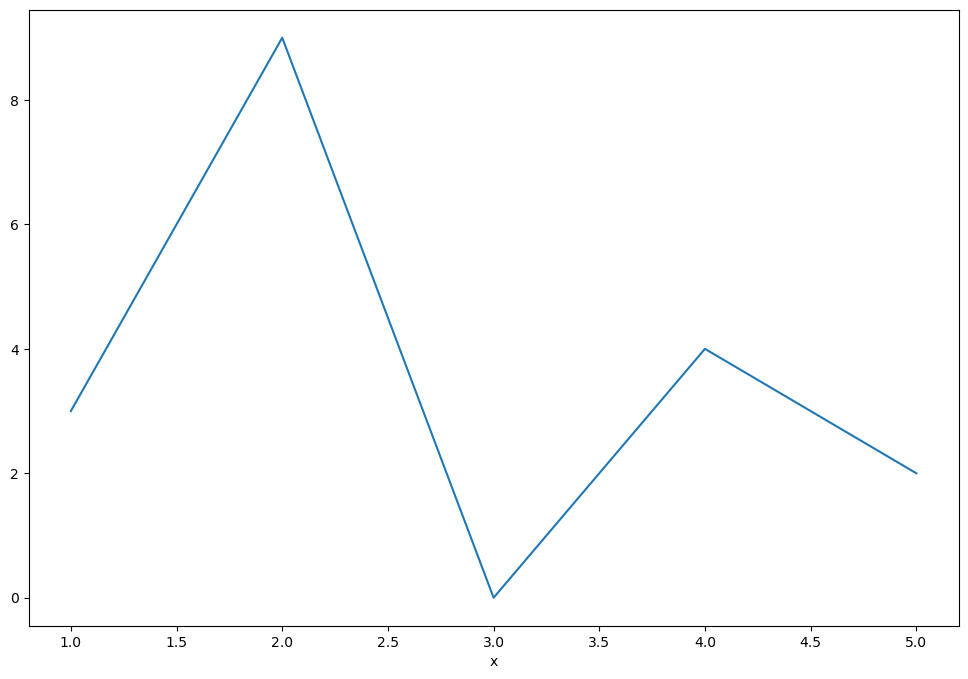

In [5]:
da.plot()

`xarray` tries to automatically pick the 'best' plot type for our DataArray, i.e. `da.plot()` gives in this case the same result as `da.plot.line()`.

### Loading netCDF data
Let's continue with spatial data! For this we are going to use some global aerosol data from NASA's [MERRA-2 dataset](https://gmao.gsfc.nasa.gov/reanalysis/MERRA-2/). This is a long-term reanalysis data set based on satellite observations and data assimilation techniques. It is distributed in the [netCDF4 file format](https://www.unidata.ucar.edu/software/netcdf/). This is a self-described data format (i.e. it includes metadata about the data itself) and is widely used in the geoscience community. `xarray` can easily [read and write](https://docs.xarray.dev/en/stable/user-guide/io.html) netCDF datasets. 

All we need to do is to type:

In [7]:
ds = xr.open_dataset("../assets/MERRA2_aer_total_colum_mass_2021-2022.nc")
ds

<xarray.Dataset>
Dimensions:  (time: 21, lon: 576, lat: 361)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01T00:30:00 ... 2022-09-01T00:30:00
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
Data variables:
    BCCMASS  (time, lat, lon) float32 ...
    DUCMASS  (time, lat, lon) float32 ...
    SSCMASS  (time, lat, lon) float32 ...
Attributes: (12/33)
    CDI:                               Climate Data Interface version 2.1.0 (...
    Conventions:                       CF-1
    Contact:                           http://gmao.gsfc.nasa.gov
    History:                           Original file generated: Tue Feb 11 23...
    Filename:                          MERRA2_400.tavgM_2d_aer_Nx.202001.nc4
    Comment:                           GMAO filename: d5124_m2_jan10.tavg1_2d...
    ...                                ...
    DataResolution:                    0.5 x 0.625
    identifier_product_doi:            10.5067/FH9A0MLJPC7N
    RangeBeginningTime:                00:00:00.000000
    RangeEndingTime:                   23:59:59.000000
    history:                           Tue Oct 25 21:59:21 2022: cdo -selyear...
    CDO:                               Climate Data Operators version 2.1.0 (...

This returns a 3D `DataSet` with a global grid at 21 timesteps. You can see that `xarray` loaded all the associated labels or metadata automatically and we can easily get an overview about the `dimensions`, `coordinates`, variables (i.e. individual `DataArrays`) and `attributes`. You can even click on the little icons on the right to show the metadata or values of individual properties of the `DataSet`.

Or we can access this information with:

In [21]:
ds.data_vars

Data variables:
    BCCMASS  (time, lat, lon) float32 ...
    DUCMASS  (time, lat, lon) float32 ...
    SSCMASS  (time, lat, lon) float32 ...

In [22]:
ds.coords
#ds.attrs

Coordinates:
  * time     (time) datetime64[ns] 2021-01-01T00:30:00 ... 2022-09-01T00:30:00
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0

The `DataSet` contains three individual variable (or `DataArrays`) that are aligned because their dimensions (time, lon, lat) are identical. 

We can access individual `DataArrays` with an atribute style syntax:

In [15]:
# this will return a DataArray from the DataSet
ssc = ds.SSCMASS
ssc

<xarray.DataArray 'SSCMASS' (time: 21, lat: 361, lon: 576)>
[4366656 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01T00:30:00 ... 2022-09-01T00:30:00
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
Attributes:
    long_name:       Sea Salt Column Mass Density
    units:           kg m-2
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

Let's try to plot the variable like before:

(array([2.528150e+06, 1.338397e+06, 4.254930e+05, 6.252300e+04,
        8.104000e+03, 2.171000e+03, 1.033000e+03, 5.710000e+02,
        1.590000e+02, 5.500000e+01]),
 array([4.02456806e-08, 2.23475763e-05, 4.46549057e-05, 6.69622386e-05,
        8.92695680e-05, 1.11576897e-04, 1.33884227e-04, 1.56191556e-04,
        1.78498885e-04, 2.00806215e-04, 2.23113544e-04]),
 <BarContainer object of 10 artists>)

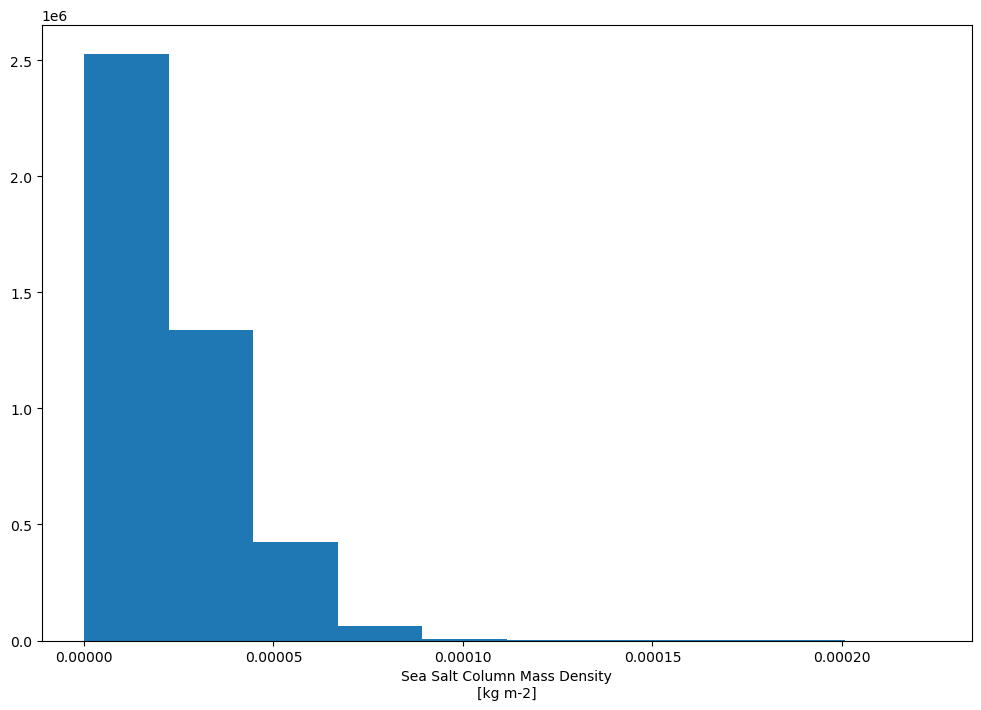

In [16]:
ds.SSCMASS.plot()

This returned a histogram plot because that's `xarrays` best effort to show all of the three dimensional data within one figure. If we want to produce a 2D map, we need to provide a 2D subset of our data.


### Indexing

If we want to try to select the first timestep of our data, we could just use [xr.isel()](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.isel.html) with:

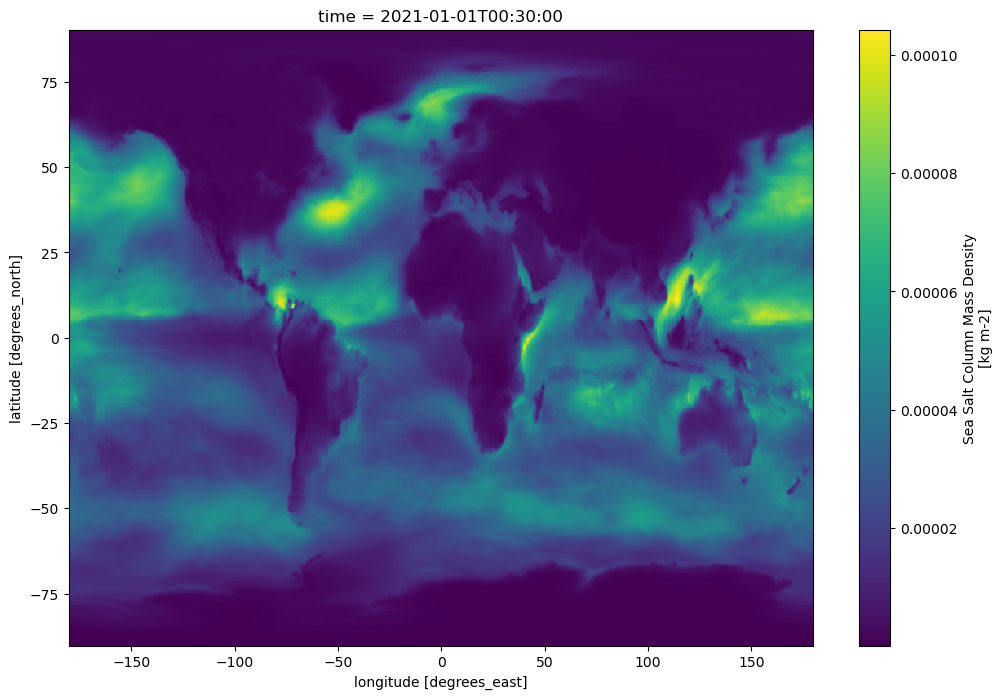

In [44]:
ds.SSCMASS.isel(time=0).plot()

This will create a map and automatically uses the metadata to label the plot! But selecting by the index is quite complicated and the same as in `numpy`. But `xarray` can do much more with [xr.sel()](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.sel.html) and this is where the labels become to get really helpful. Let's select the first timestep by the actual year and month:

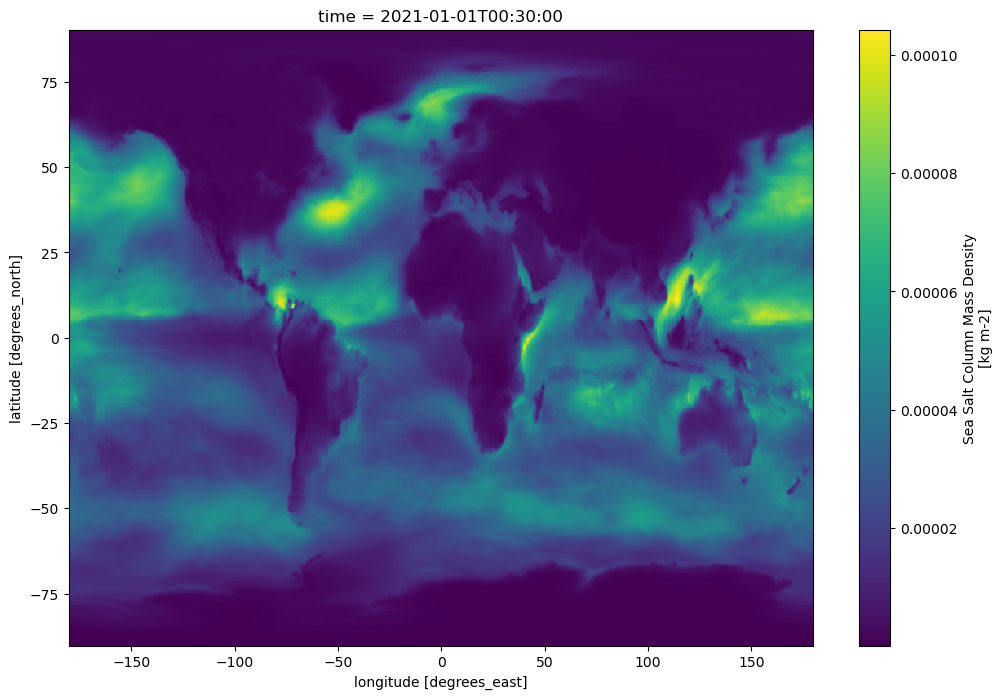

In [18]:
ds.SSCMASS.sel(time="2021-01-01").plot()

This produces exactly the same plot, but it is now much easier to specify the timestep we want to plot by the so-called [`datetime64` data type](https://docs.xarray.dev/en/stable/user-guide/time-series.html). Let's look at the time dimension again:

In [ ]:
ds.time

We can also pass a slice to `xr.sel()`:

In [20]:
# select all data from year 2021
ssc_slice = ds.SSCMASS.sel(time=slice("2021-01-01", "2021-12-01"))
ssc_slice

<xarray.DataArray 'SSCMASS' (time: 12, lat: 361, lon: 576)>
[2495232 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01T00:30:00 ... 2021-12-01T00:30:00
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
Attributes:
    long_name:       Sea Salt Column Mass Density
    units:           kg m-2
    fmissing_value:  1000000000000000.0
    vmax:            1000000000000000.0
    vmin:            -1000000000000000.0

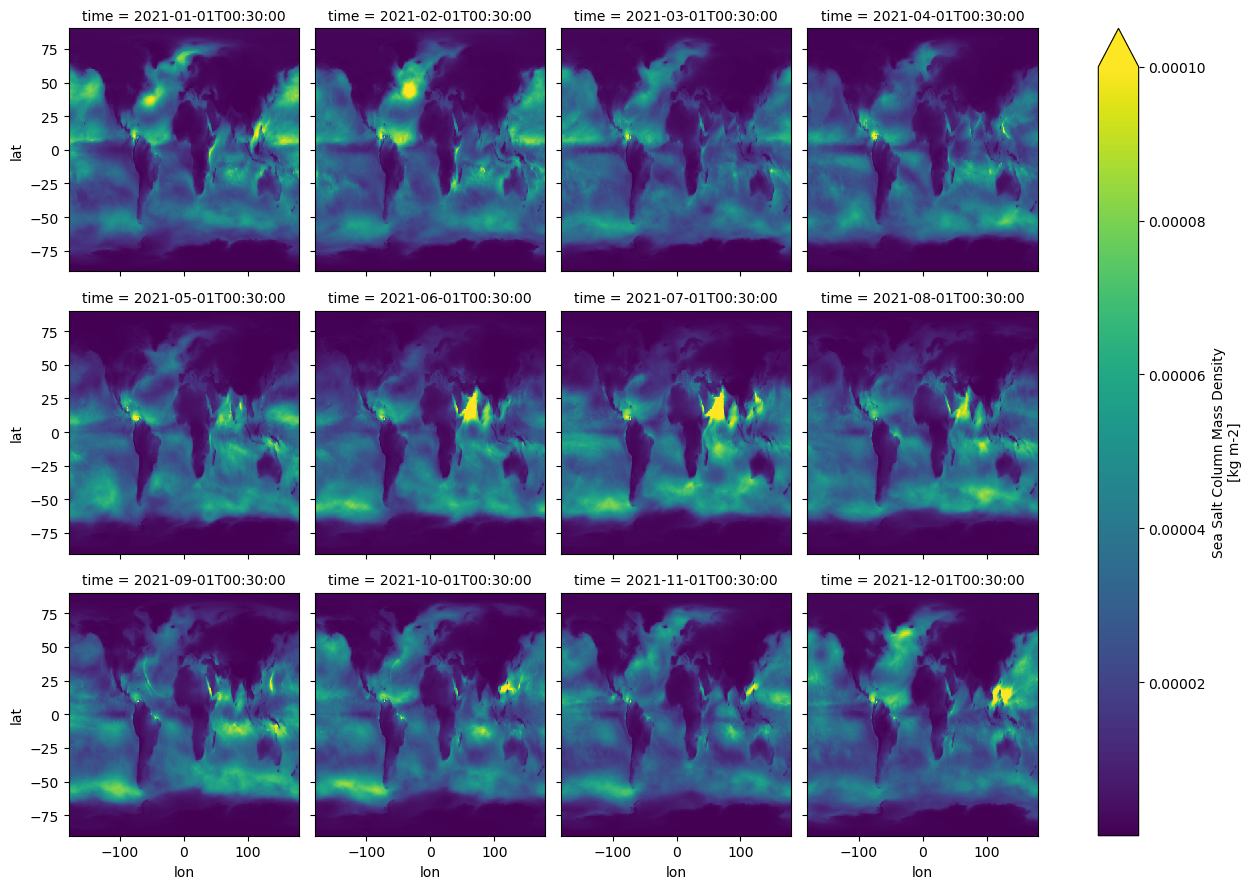

In [13]:
ssc_slice.plot(col = 'time', col_wrap=4, vmax=0.0001)

### Averaging

Another way to reduce the dimensions of our data is averaging. `xarray` provides the [xr.mean()](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.mean.html) function for this. The simplest case is to average all values for a given variable:

In [32]:
ds_mean = ds.mean()
ds_mean

<xarray.Dataset>
Dimensions:  ()
Data variables:
    BCCMASS  float32 4.795e-07
    DUCMASS  float32 3.704e-05
    SSCMASS  float32 2.003e-05

We can also easily average across any single dimension ...

In [34]:
ds_time_mean = ds.mean("time")
ds_time_mean

<xarray.Dataset>
Dimensions:  (lon: 576, lat: 361)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
Data variables:
    BCCMASS  (lat, lon) float32 9.634e-08 9.634e-08 ... 3.969e-07 3.969e-07
    DUCMASS  (lat, lon) float32 2.375e-06 2.375e-06 ... 1.684e-05 1.684e-05
    SSCMASS  (lat, lon) float32 3.983e-07 3.983e-07 ... 1.035e-06 1.035e-06

... or multiple dimensions:

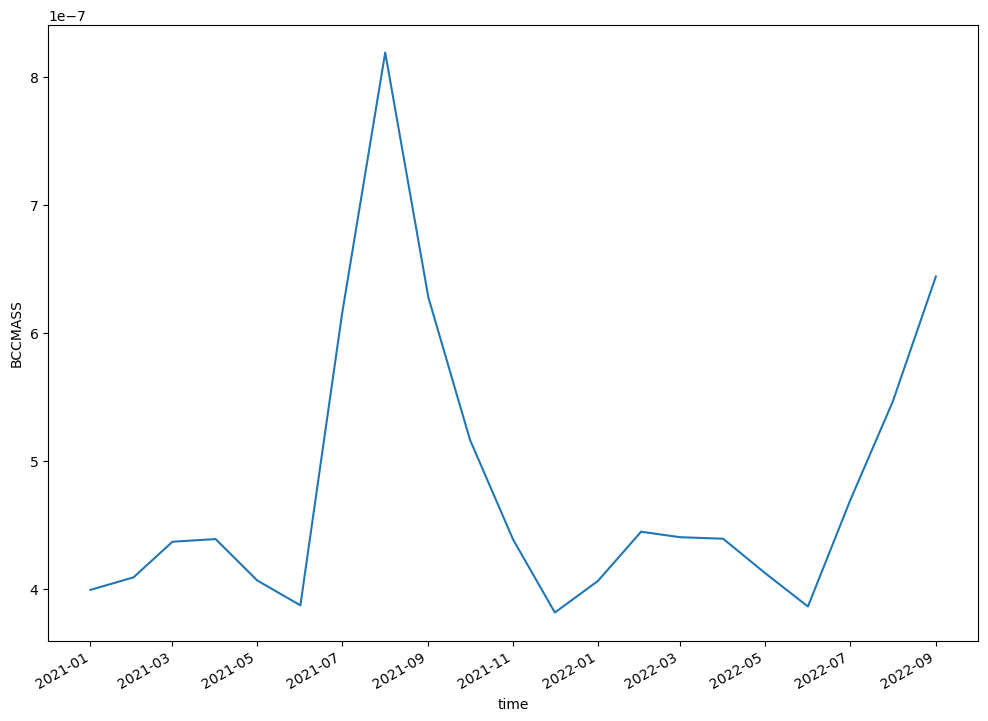

In [42]:
ds.BCCMASS.mean(("lat", "lon")).plot()

Weighted means can be calculated via the [weighted array reduction](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.weighted.html#xarray.Dataset.weighted) (see exercise).

This was just a very short introduction to xarray to give you an idea about the syntax and some of the possibilities that the labeled `DataArray` and `DataSet` open up. On the next page you should practice some of these concepts by analysing satllite observation data.

## [[Previous: Vector data in geopandas¶](./03-vectors.ipynb)] | [[Next: xarray fundamentals exercise¶](./05-xarray_exercise.ipynb)]